## Covid 19 Case Data - United States (CA & IN focus)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import csv
import gmaps
from us import states
import numpy as np
import requests
from config import gkey
from config import rapid_api_key
from config import rapidapi_host
from pprint import pprint
import datetime

In [2]:
pd.options.display.max_rows = 200
# pd.options.display.max_rows

In [3]:
# os.getcwd()
# os.chdir('C:\\gitlab\\covid19')

In [4]:
#Import files to use with API's
county_path = 'Resources/us_counties_states.csv'
date_path = 'Resources/dates.csv'

In [5]:
# us_counties_df = pd.read_csv(county_path)
# Create a filter to bring in only California and Indiana
# mask1 = us_counties_df['State'] != 'California'
# mask2 = us_counties_df['State'] != 'Indiana'
# us_counties_df = us_counties_df[mask1 & mask2]
# us_counties_df.head()
us_counties_df = pd.read_csv(county_path)
us_counties_df

,County,State,"County, State"
0,Autauga,Alabama,"Autauga,Alabama"
1,Baldwin,Alabama,"Baldwin,Alabama"
2,Barbour,Alabama,"Barbour,Alabama"
3,Bibb,Alabama,"Bibb,Alabama"
4,Blount,Alabama,"Blount,Alabama"
...,...,...,...
3138,Sweetwater,Wyoming,"Sweetwater,Wyoming"
3139,Teton,Wyoming,"Teton,Wyoming"
3140,Uinta,Wyoming,"Uinta,Wyoming"
3141,Washakie,Wyoming,"Washakie,Wyoming"


In [6]:
date_df = pd.read_csv(date_path)

In [7]:
# mask1 = date_df['Date']>'2020-10-10'
# date_df=date_df[mask1]
# date_df.head()

### API Calls to Pull Coronavirus Data by County

In [8]:
county_list = []
state_list = []
county_list = us_counties_df['County, State'].tolist()
# date_list = date_df['Date'].tolist()
date_list = ['2020-10-16']

In [9]:
# state='Indiana'
# county='Marion'
# date_val = '2020-10-15'
# country_state = "US " + state

# url = "https://covid-19-statistics.p.rapidapi.com/reports"
# headers = {'x-rapidapi-host': rapidapi_host,'x-rapidapi-key': rapid_api_key}
# querystring = {"region_province":state,"iso":"USA","region_name":"US","city_name":county, \
#                            "date":date_val,"q":country_state}   

# response = requests.request("GET", url, headers=headers, params=querystring).json()

# pprint(response)

In [10]:
# Run API to collect county level data
url = "https://covid-19-statistics.p.rapidapi.com/reports"
headers = {'x-rapidapi-host': rapidapi_host,'x-rapidapi-key': rapid_api_key}

# Map County Lists
map_county_state_list = []
map_new_county_list = []
map_tot_county_cases = []
map_new_county_cases = []
map_tot_county_deaths = []
map_new_county_deaths = []
map_county_date = []
map_county_lat = []
map_county_lng = []

# County Lists
county_state_list = []
new_county_list = []
tot_county_cases = []
new_county_cases = []
tot_county_deaths = []
new_county_deaths = []
county_date = []
county_lat = []
county_lng = []

record_counter = 0
set_counter = 0

for date_val in date_list:    
    try:        
        set_counter += 1

        for name in county_list:
            value = name.split(',')
            county = value[0]
            state = value[1]
            country_state = "US " + state
            record_counter +=1

            querystring = {"region_province":state,"iso":"USA","region_name":"US","city_name":county, \
                           "date":date_val,"q":country_state}   

            response = requests.request("GET", url, headers=headers, params=querystring).json()    

            try:
                # Add Map information
                map_county_state_list.append(response['data'][0]['region']['province'])
                map_new_county_list.append(response['data'][0]['region']['cities'][0]['name'])
                map_tot_county_cases.append(response['data'][0]['region']['cities'][0]['confirmed'])
                map_new_county_cases.append(response['data'][0]['region']['cities'][0]['confirmed_diff'])
                map_tot_county_deaths.append(response['data'][0]['region']['cities'][0]['deaths'])
                map_new_county_deaths.append(response['data'][0]['region']['cities'][0]['deaths_diff'])
                map_county_date.append(response['data'][0]['region']['cities'][0]['date'])
                map_county_lat.append(response['data'][0]['region']['cities'][0]['lat'])
                map_county_lng.append(response['data'][0]['region']['cities'][0]['long'])

                # Add County information
                county_state_list.append(response['data'][0]['region']['province'])
                new_county_list.append(response['data'][0]['region']['cities'][0]['name'])
                tot_county_cases.append(response['data'][0]['region']['cities'][0]['confirmed'])
                new_county_cases.append(response['data'][0]['region']['cities'][0]['confirmed_diff'])
                tot_county_deaths.append(response['data'][0]['region']['cities'][0]['deaths'])
                new_county_deaths.append(response['data'][0]['region']['cities'][0]['deaths_diff'])
                county_date.append(response['data'][0]['region']['cities'][0]['date'])
                county_lat.append(response['data'][0]['region']['cities'][0]['lat'])
                county_lng.append(response['data'][0]['region']['cities'][0]['long'])

                if record_counter > 150:
                    record_counter = 1
                    set_counter += 1

                print(f'Processing record {record_counter} of set {set_counter} | {county}, {state}, {date_val}.')

            except:
                record_counter -= 1
                print(f'Error: County: {county} and State:{state} not found for: {date_val}')
                
        set_counter += 1
        
    except:
        print(f'Date Error: {date_val} was not processed')
            
print(f'---------------------------------Process Completed----------------------------------------')


Processing record 1 of set 1 | Autauga, Alabama, 2020-10-16.
Processing record 2 of set 1 | Baldwin, Alabama, 2020-10-16.
Processing record 3 of set 1 | Barbour, Alabama, 2020-10-16.
Processing record 4 of set 1 | Bibb, Alabama, 2020-10-16.
Processing record 5 of set 1 | Blount, Alabama, 2020-10-16.
Processing record 6 of set 1 | Bullock, Alabama, 2020-10-16.
Processing record 7 of set 1 | Butler, Alabama, 2020-10-16.
Processing record 8 of set 1 | Calhoun, Alabama, 2020-10-16.
Processing record 9 of set 1 | Chambers, Alabama, 2020-10-16.
Processing record 10 of set 1 | Cherokee, Alabama, 2020-10-16.
Processing record 11 of set 1 | Chilton, Alabama, 2020-10-16.
Processing record 12 of set 1 | Choctaw, Alabama, 2020-10-16.
Processing record 13 of set 1 | Clarke, Alabama, 2020-10-16.
Processing record 14 of set 1 | Clay, Alabama, 2020-10-16.
Processing record 15 of set 1 | Cleburne, Alabama, 2020-10-16.
Processing record 16 of set 1 | Coffee, Alabama, 2020-10-16.
Processing record 17 of 

Processing record 111 of set 1 | Crittenden, Arkansas, 2020-10-16.
Processing record 112 of set 1 | Cross, Arkansas, 2020-10-16.
Processing record 113 of set 1 | Dallas, Arkansas, 2020-10-16.
Processing record 114 of set 1 | Desha, Arkansas, 2020-10-16.
Processing record 115 of set 1 | Drew, Arkansas, 2020-10-16.
Processing record 116 of set 1 | Faulkner, Arkansas, 2020-10-16.
Processing record 117 of set 1 | Franklin, Arkansas, 2020-10-16.
Processing record 118 of set 1 | Fulton, Arkansas, 2020-10-16.
Processing record 119 of set 1 | Garland, Arkansas, 2020-10-16.
Processing record 120 of set 1 | Grant, Arkansas, 2020-10-16.
Processing record 121 of set 1 | Greene, Arkansas, 2020-10-16.
Processing record 122 of set 1 | Hempstead, Arkansas, 2020-10-16.
Processing record 123 of set 1 | Hot Spring, Arkansas, 2020-10-16.
Processing record 124 of set 1 | Howard, Arkansas, 2020-10-16.
Processing record 125 of set 1 | Independence, Arkansas, 2020-10-16.
Processing record 126 of set 1 | Izard

Processing record 87 of set 2 | Costilla, Colorado, 2020-10-16.
Processing record 88 of set 2 | Crowley, Colorado, 2020-10-16.
Processing record 89 of set 2 | Custer, Colorado, 2020-10-16.
Processing record 90 of set 2 | Delta, Colorado, 2020-10-16.
Error: County: Denver and State: City and Co not found for: 2020-10-16
Processing record 91 of set 2 | Dolores, Colorado, 2020-10-16.
Processing record 92 of set 2 | Douglas, Colorado, 2020-10-16.
Processing record 93 of set 2 | Eagle, Colorado, 2020-10-16.
Processing record 94 of set 2 | Elbert, Colorado, 2020-10-16.
Processing record 95 of set 2 | El Paso, Colorado, 2020-10-16.
Processing record 96 of set 2 | Fremont, Colorado, 2020-10-16.
Processing record 97 of set 2 | Garfield, Colorado, 2020-10-16.
Processing record 98 of set 2 | Gilpin, Colorado, 2020-10-16.
Processing record 99 of set 2 | Grand, Colorado, 2020-10-16.
Processing record 100 of set 2 | Gunnison, Colorado, 2020-10-16.
Processing record 101 of set 2 | Hinsdale, Colorado,

Processing record 65 of set 3 | Washington, Florida, 2020-10-16.
Processing record 66 of set 3 | Appling, Georgia, 2020-10-16.
Processing record 67 of set 3 | Atkinson, Georgia, 2020-10-16.
Processing record 68 of set 3 | Bacon, Georgia, 2020-10-16.
Processing record 69 of set 3 | Baker, Georgia, 2020-10-16.
Processing record 70 of set 3 | Baldwin, Georgia, 2020-10-16.
Processing record 71 of set 3 | Banks, Georgia, 2020-10-16.
Processing record 72 of set 3 | Barrow, Georgia, 2020-10-16.
Processing record 73 of set 3 | Bartow, Georgia, 2020-10-16.
Processing record 74 of set 3 | Ben Hill, Georgia, 2020-10-16.
Processing record 75 of set 3 | Berrien, Georgia, 2020-10-16.
Processing record 76 of set 3 | Bibb, Georgia, 2020-10-16.
Processing record 77 of set 3 | Bleckley, Georgia, 2020-10-16.
Processing record 78 of set 3 | Brantley, Georgia, 2020-10-16.
Processing record 79 of set 3 | Brooks, Georgia, 2020-10-16.
Processing record 80 of set 3 | Bryan, Georgia, 2020-10-16.
Processing reco

Processing record 48 of set 4 | Taylor, Georgia, 2020-10-16.
Processing record 49 of set 4 | Telfair, Georgia, 2020-10-16.
Processing record 50 of set 4 | Terrell, Georgia, 2020-10-16.
Processing record 51 of set 4 | Thomas, Georgia, 2020-10-16.
Processing record 52 of set 4 | Tift, Georgia, 2020-10-16.
Processing record 53 of set 4 | Toombs, Georgia, 2020-10-16.
Processing record 54 of set 4 | Towns, Georgia, 2020-10-16.
Processing record 55 of set 4 | Treutlen, Georgia, 2020-10-16.
Processing record 56 of set 4 | Troup, Georgia, 2020-10-16.
Processing record 57 of set 4 | Turner, Georgia, 2020-10-16.
Processing record 58 of set 4 | Twiggs, Georgia, 2020-10-16.
Processing record 59 of set 4 | Union, Georgia, 2020-10-16.
Processing record 60 of set 4 | Upson, Georgia, 2020-10-16.
Processing record 61 of set 4 | Walker, Georgia, 2020-10-16.
Processing record 62 of set 4 | Walton, Georgia, 2020-10-16.
Processing record 63 of set 4 | Ware, Georgia, 2020-10-16.
Processing record 64 of set 

Processing record 26 of set 5 | Macon, Illinois, 2020-10-16.
Processing record 27 of set 5 | Macoupin, Illinois, 2020-10-16.
Processing record 28 of set 5 | Madison, Illinois, 2020-10-16.
Processing record 29 of set 5 | Marion, Illinois, 2020-10-16.
Processing record 30 of set 5 | Marshall, Illinois, 2020-10-16.
Processing record 31 of set 5 | Mason, Illinois, 2020-10-16.
Processing record 32 of set 5 | Massac, Illinois, 2020-10-16.
Processing record 33 of set 5 | Menard, Illinois, 2020-10-16.
Processing record 34 of set 5 | Mercer, Illinois, 2020-10-16.
Processing record 35 of set 5 | Monroe, Illinois, 2020-10-16.
Processing record 36 of set 5 | Montgomery, Illinois, 2020-10-16.
Processing record 37 of set 5 | Morgan, Illinois, 2020-10-16.
Processing record 38 of set 5 | Moultrie, Illinois, 2020-10-16.
Processing record 39 of set 5 | Ogle, Illinois, 2020-10-16.
Processing record 40 of set 5 | Peoria, Illinois, 2020-10-16.
Processing record 41 of set 5 | Perry, Illinois, 2020-10-16.
Pr

Processing record 8 of set 6 | Washington, Indiana, 2020-10-16.
Processing record 9 of set 6 | Wayne, Indiana, 2020-10-16.
Processing record 10 of set 6 | Wells, Indiana, 2020-10-16.
Processing record 11 of set 6 | White, Indiana, 2020-10-16.
Processing record 12 of set 6 | Whitley, Indiana, 2020-10-16.
Processing record 13 of set 6 | Adair, Iowa, 2020-10-16.
Processing record 14 of set 6 | Adams, Iowa, 2020-10-16.
Processing record 15 of set 6 | Allamakee, Iowa, 2020-10-16.
Processing record 16 of set 6 | Appanoose, Iowa, 2020-10-16.
Processing record 17 of set 6 | Audubon, Iowa, 2020-10-16.
Processing record 18 of set 6 | Benton, Iowa, 2020-10-16.
Processing record 19 of set 6 | Black Hawk, Iowa, 2020-10-16.
Processing record 20 of set 6 | Boone, Iowa, 2020-10-16.
Processing record 21 of set 6 | Bremer, Iowa, 2020-10-16.
Processing record 22 of set 6 | Buchanan, Iowa, 2020-10-16.
Processing record 23 of set 6 | Buena Vista, Iowa, 2020-10-16.
Processing record 24 of set 6 | Butler, Io

Processing record 146 of set 6 | Gray, Kansas, 2020-10-16.
Processing record 147 of set 6 | Greeley, Kansas, 2020-10-16.
Processing record 148 of set 6 | Greenwood, Kansas, 2020-10-16.
Processing record 149 of set 6 | Hamilton, Kansas, 2020-10-16.
Processing record 150 of set 6 | Harper, Kansas, 2020-10-16.
Processing record 1 of set 7 | Harvey, Kansas, 2020-10-16.
Processing record 2 of set 7 | Haskell, Kansas, 2020-10-16.
Processing record 3 of set 7 | Hodgeman, Kansas, 2020-10-16.
Processing record 4 of set 7 | Jackson, Kansas, 2020-10-16.
Processing record 5 of set 7 | Jefferson, Kansas, 2020-10-16.
Processing record 6 of set 7 | Jewell, Kansas, 2020-10-16.
Processing record 7 of set 7 | Johnson, Kansas, 2020-10-16.
Processing record 8 of set 7 | Kearny, Kansas, 2020-10-16.
Processing record 9 of set 7 | Kingman, Kansas, 2020-10-16.
Processing record 10 of set 7 | Kiowa, Kansas, 2020-10-16.
Processing record 11 of set 7 | Labette, Kansas, 2020-10-16.
Processing record 12 of set 7 |

Processing record 129 of set 7 | Laurel, Kentucky, 2020-10-16.
Processing record 130 of set 7 | Lawrence, Kentucky, 2020-10-16.
Processing record 131 of set 7 | Lee, Kentucky, 2020-10-16.
Processing record 132 of set 7 | Leslie, Kentucky, 2020-10-16.
Processing record 133 of set 7 | Letcher, Kentucky, 2020-10-16.
Processing record 134 of set 7 | Lewis, Kentucky, 2020-10-16.
Processing record 135 of set 7 | Lincoln, Kentucky, 2020-10-16.
Processing record 136 of set 7 | Livingston, Kentucky, 2020-10-16.
Processing record 137 of set 7 | Logan, Kentucky, 2020-10-16.
Processing record 138 of set 7 | Lyon, Kentucky, 2020-10-16.
Processing record 139 of set 7 | McCracken, Kentucky, 2020-10-16.
Processing record 140 of set 7 | McCreary, Kentucky, 2020-10-16.
Processing record 141 of set 7 | McLean, Kentucky, 2020-10-16.
Processing record 142 of set 7 | Madison, Kentucky, 2020-10-16.
Processing record 143 of set 7 | Magoffin, Kentucky, 2020-10-16.
Processing record 144 of set 7 | Marion, Kentu

Processing record 107 of set 8 | Knox, Maine, 2020-10-16.
Processing record 108 of set 8 | Lincoln, Maine, 2020-10-16.
Processing record 109 of set 8 | Oxford, Maine, 2020-10-16.
Processing record 110 of set 8 | Penobscot, Maine, 2020-10-16.
Processing record 111 of set 8 | Piscataquis, Maine, 2020-10-16.
Processing record 112 of set 8 | Sagadahoc, Maine, 2020-10-16.
Processing record 113 of set 8 | Somerset, Maine, 2020-10-16.
Processing record 114 of set 8 | Waldo, Maine, 2020-10-16.
Processing record 115 of set 8 | Washington, Maine, 2020-10-16.
Processing record 116 of set 8 | York, Maine, 2020-10-16.
Processing record 117 of set 8 | Allegany, Maryland, 2020-10-16.
Processing record 118 of set 8 | Anne Arundel, Maryland, 2020-10-16.
Processing record 119 of set 8 | Baltimore, Maryland, 2020-10-16.
Processing record 120 of set 8 | Calvert, Maryland, 2020-10-16.
Processing record 121 of set 8 | Caroline, Maryland, 2020-10-16.
Processing record 122 of set 8 | Carroll, Maryland, 2020-1

Processing record 83 of set 9 | Washtenaw, Michigan, 2020-10-16.
Processing record 84 of set 9 | Wayne, Michigan, 2020-10-16.
Processing record 85 of set 9 | Wexford, Michigan, 2020-10-16.
Processing record 86 of set 9 | Aitkin, Minnesota, 2020-10-16.
Processing record 87 of set 9 | Anoka, Minnesota, 2020-10-16.
Processing record 88 of set 9 | Becker, Minnesota, 2020-10-16.
Processing record 89 of set 9 | Beltrami, Minnesota, 2020-10-16.
Processing record 90 of set 9 | Benton, Minnesota, 2020-10-16.
Processing record 91 of set 9 | Big Stone, Minnesota, 2020-10-16.
Processing record 92 of set 9 | Blue Earth, Minnesota, 2020-10-16.
Processing record 93 of set 9 | Brown, Minnesota, 2020-10-16.
Processing record 94 of set 9 | Carlton, Minnesota, 2020-10-16.
Processing record 95 of set 9 | Carver, Minnesota, 2020-10-16.
Processing record 96 of set 9 | Cass, Minnesota, 2020-10-16.
Processing record 97 of set 9 | Chippewa, Minnesota, 2020-10-16.
Processing record 98 of set 9 | Chisago, Minnes

Processing record 59 of set 10 | Lamar, Mississippi, 2020-10-16.
Processing record 60 of set 10 | Lauderdale, Mississippi, 2020-10-16.
Processing record 61 of set 10 | Lawrence, Mississippi, 2020-10-16.
Processing record 62 of set 10 | Leake, Mississippi, 2020-10-16.
Processing record 63 of set 10 | Lee, Mississippi, 2020-10-16.
Processing record 64 of set 10 | Leflore, Mississippi, 2020-10-16.
Processing record 65 of set 10 | Lincoln, Mississippi, 2020-10-16.
Processing record 66 of set 10 | Lowndes, Mississippi, 2020-10-16.
Processing record 67 of set 10 | Madison, Mississippi, 2020-10-16.
Processing record 68 of set 10 | Marion, Mississippi, 2020-10-16.
Processing record 69 of set 10 | Marshall, Mississippi, 2020-10-16.
Processing record 70 of set 10 | Monroe, Mississippi, 2020-10-16.
Processing record 71 of set 10 | Montgomery, Mississippi, 2020-10-16.
Processing record 72 of set 10 | Neshoba, Mississippi, 2020-10-16.
Processing record 73 of set 10 | Newton, Mississippi, 2020-10-16

Processing record 35 of set 11 | Phelps, Missouri, 2020-10-16.
Processing record 36 of set 11 | Pike, Missouri, 2020-10-16.
Processing record 37 of set 11 | Platte, Missouri, 2020-10-16.
Processing record 38 of set 11 | Polk, Missouri, 2020-10-16.
Processing record 39 of set 11 | Pulaski, Missouri, 2020-10-16.
Processing record 40 of set 11 | Putnam, Missouri, 2020-10-16.
Processing record 41 of set 11 | Ralls, Missouri, 2020-10-16.
Processing record 42 of set 11 | Randolph, Missouri, 2020-10-16.
Processing record 43 of set 11 | Ray, Missouri, 2020-10-16.
Processing record 44 of set 11 | Reynolds, Missouri, 2020-10-16.
Processing record 45 of set 11 | Ripley, Missouri, 2020-10-16.
Processing record 46 of set 11 | St. Charles, Missouri, 2020-10-16.
Processing record 47 of set 11 | St. Clair, Missouri, 2020-10-16.
Processing record 48 of set 11 | Ste. Genevieve, Missouri, 2020-10-16.
Processing record 49 of set 11 | St. Francois, Missouri, 2020-10-16.
Processing record 50 of set 11 | St.

Processing record 14 of set 12 | Greeley, Nebraska, 2020-10-16.
Processing record 15 of set 12 | Hall, Nebraska, 2020-10-16.
Processing record 16 of set 12 | Hamilton, Nebraska, 2020-10-16.
Processing record 17 of set 12 | Harlan, Nebraska, 2020-10-16.
Processing record 18 of set 12 | Hayes, Nebraska, 2020-10-16.
Processing record 19 of set 12 | Hitchcock, Nebraska, 2020-10-16.
Processing record 20 of set 12 | Holt, Nebraska, 2020-10-16.
Processing record 21 of set 12 | Hooker, Nebraska, 2020-10-16.
Processing record 22 of set 12 | Howard, Nebraska, 2020-10-16.
Processing record 23 of set 12 | Jefferson, Nebraska, 2020-10-16.
Processing record 24 of set 12 | Johnson, Nebraska, 2020-10-16.
Processing record 25 of set 12 | Kearney, Nebraska, 2020-10-16.
Processing record 26 of set 12 | Keith, Nebraska, 2020-10-16.
Processing record 27 of set 12 | Keya Paha, Nebraska, 2020-10-16.
Processing record 28 of set 12 | Kimball, Nebraska, 2020-10-16.
Processing record 29 of set 12 | Knox, Nebrask

Processing record 139 of set 12 | Sandoval, New Mexico, 2020-10-16.
Processing record 140 of set 12 | San Juan, New Mexico, 2020-10-16.
Processing record 141 of set 12 | San Miguel, New Mexico, 2020-10-16.
Processing record 142 of set 12 | Santa Fe, New Mexico, 2020-10-16.
Processing record 143 of set 12 | Sierra, New Mexico, 2020-10-16.
Processing record 144 of set 12 | Socorro, New Mexico, 2020-10-16.
Processing record 145 of set 12 | Taos, New Mexico, 2020-10-16.
Processing record 146 of set 12 | Torrance, New Mexico, 2020-10-16.
Processing record 147 of set 12 | Union, New Mexico, 2020-10-16.
Processing record 148 of set 12 | Valencia, New Mexico, 2020-10-16.
Processing record 149 of set 12 | Albany, New York, 2020-10-16.
Processing record 150 of set 12 | Allegany, New York, 2020-10-16.
Processing record 1 of set 13 | Bronx, New York, 2020-10-16.
Processing record 2 of set 13 | Broome, New York, 2020-10-16.
Processing record 3 of set 13 | Cattaraugus, New York, 2020-10-16.
Processi

Processing record 112 of set 13 | Jones, North Carolina, 2020-10-16.
Processing record 113 of set 13 | Lee, North Carolina, 2020-10-16.
Processing record 114 of set 13 | Lenoir, North Carolina, 2020-10-16.
Processing record 115 of set 13 | Lincoln, North Carolina, 2020-10-16.
Processing record 116 of set 13 | McDowell, North Carolina, 2020-10-16.
Processing record 117 of set 13 | Macon, North Carolina, 2020-10-16.
Processing record 118 of set 13 | Madison, North Carolina, 2020-10-16.
Processing record 119 of set 13 | Martin, North Carolina, 2020-10-16.
Processing record 120 of set 13 | Mecklenburg, North Carolina, 2020-10-16.
Processing record 121 of set 13 | Mitchell, North Carolina, 2020-10-16.
Processing record 122 of set 13 | Montgomery, North Carolina, 2020-10-16.
Processing record 123 of set 13 | Moore, North Carolina, 2020-10-16.
Processing record 124 of set 13 | Nash, North Carolina, 2020-10-16.
Processing record 125 of set 13 | New Hanover, North Carolina, 2020-10-16.
Processi

Processing record 84 of set 14 | Delaware, Ohio, 2020-10-16.
Processing record 85 of set 14 | Erie, Ohio, 2020-10-16.
Processing record 86 of set 14 | Fairfield, Ohio, 2020-10-16.
Processing record 87 of set 14 | Fayette, Ohio, 2020-10-16.
Processing record 88 of set 14 | Franklin, Ohio, 2020-10-16.
Processing record 89 of set 14 | Fulton, Ohio, 2020-10-16.
Processing record 90 of set 14 | Gallia, Ohio, 2020-10-16.
Processing record 91 of set 14 | Geauga, Ohio, 2020-10-16.
Processing record 92 of set 14 | Greene, Ohio, 2020-10-16.
Processing record 93 of set 14 | Guernsey, Ohio, 2020-10-16.
Processing record 94 of set 14 | Hamilton, Ohio, 2020-10-16.
Processing record 95 of set 14 | Hancock, Ohio, 2020-10-16.
Processing record 96 of set 14 | Hardin, Ohio, 2020-10-16.
Processing record 97 of set 14 | Harrison, Ohio, 2020-10-16.
Processing record 98 of set 14 | Henry, Ohio, 2020-10-16.
Processing record 99 of set 14 | Highland, Ohio, 2020-10-16.
Processing record 100 of set 14 | Hocking,

Processing record 67 of set 15 | Rogers, Oklahoma, 2020-10-16.
Processing record 68 of set 15 | Seminole, Oklahoma, 2020-10-16.
Processing record 69 of set 15 | Sequoyah, Oklahoma, 2020-10-16.
Processing record 70 of set 15 | Stephens, Oklahoma, 2020-10-16.
Processing record 71 of set 15 | Texas, Oklahoma, 2020-10-16.
Processing record 72 of set 15 | Tillman, Oklahoma, 2020-10-16.
Processing record 73 of set 15 | Tulsa, Oklahoma, 2020-10-16.
Processing record 74 of set 15 | Wagoner, Oklahoma, 2020-10-16.
Processing record 75 of set 15 | Washington, Oklahoma, 2020-10-16.
Processing record 76 of set 15 | Washita, Oklahoma, 2020-10-16.
Processing record 77 of set 15 | Woods, Oklahoma, 2020-10-16.
Processing record 78 of set 15 | Woodward, Oklahoma, 2020-10-16.
Processing record 79 of set 15 | Baker, Oregon, 2020-10-16.
Processing record 80 of set 15 | Benton, Oregon, 2020-10-16.
Processing record 81 of set 15 | Clackamas, Oregon, 2020-10-16.
Processing record 82 of set 15 | Clatsop, Orego

Processing record 41 of set 16 | Bamberg, South Carolina, 2020-10-16.
Processing record 42 of set 16 | Barnwell, South Carolina, 2020-10-16.
Processing record 43 of set 16 | Beaufort, South Carolina, 2020-10-16.
Processing record 44 of set 16 | Berkeley, South Carolina, 2020-10-16.
Processing record 45 of set 16 | Calhoun, South Carolina, 2020-10-16.
Processing record 46 of set 16 | Charleston, South Carolina, 2020-10-16.
Processing record 47 of set 16 | Cherokee, South Carolina, 2020-10-16.
Processing record 48 of set 16 | Chester, South Carolina, 2020-10-16.
Processing record 49 of set 16 | Chesterfield, South Carolina, 2020-10-16.
Processing record 50 of set 16 | Clarendon, South Carolina, 2020-10-16.
Processing record 51 of set 16 | Colleton, South Carolina, 2020-10-16.
Processing record 52 of set 16 | Darlington, South Carolina, 2020-10-16.
Processing record 53 of set 16 | Dillon, South Carolina, 2020-10-16.
Processing record 54 of set 16 | Dorchester, South Carolina, 2020-10-16.


Processing record 9 of set 17 | Chester, Tennessee, 2020-10-16.
Processing record 10 of set 17 | Claiborne, Tennessee, 2020-10-16.
Processing record 11 of set 17 | Clay, Tennessee, 2020-10-16.
Processing record 12 of set 17 | Cocke, Tennessee, 2020-10-16.
Processing record 13 of set 17 | Coffee, Tennessee, 2020-10-16.
Processing record 14 of set 17 | Crockett, Tennessee, 2020-10-16.
Processing record 15 of set 17 | Cumberland, Tennessee, 2020-10-16.
Processing record 16 of set 17 | Davidson, Tennessee, 2020-10-16.
Processing record 17 of set 17 | Decatur, Tennessee, 2020-10-16.
Processing record 18 of set 17 | DeKalb, Tennessee, 2020-10-16.
Processing record 19 of set 17 | Dickson, Tennessee, 2020-10-16.
Processing record 20 of set 17 | Dyer, Tennessee, 2020-10-16.
Processing record 21 of set 17 | Fayette, Tennessee, 2020-10-16.
Processing record 22 of set 17 | Fentress, Tennessee, 2020-10-16.
Processing record 23 of set 17 | Franklin, Tennessee, 2020-10-16.
Processing record 24 of set

Processing record 138 of set 17 | Comal, Texas, 2020-10-16.
Processing record 139 of set 17 | Comanche, Texas, 2020-10-16.
Processing record 140 of set 17 | Concho, Texas, 2020-10-16.
Processing record 141 of set 17 | Cooke, Texas, 2020-10-16.
Processing record 142 of set 17 | Coryell, Texas, 2020-10-16.
Processing record 143 of set 17 | Cottle, Texas, 2020-10-16.
Processing record 144 of set 17 | Crane, Texas, 2020-10-16.
Processing record 145 of set 17 | Crockett, Texas, 2020-10-16.
Processing record 146 of set 17 | Crosby, Texas, 2020-10-16.
Processing record 147 of set 17 | Culberson, Texas, 2020-10-16.
Processing record 148 of set 17 | Dallam, Texas, 2020-10-16.
Processing record 149 of set 17 | Dallas, Texas, 2020-10-16.
Processing record 150 of set 17 | Dawson, Texas, 2020-10-16.
Processing record 1 of set 18 | Deaf Smith, Texas, 2020-10-16.
Processing record 2 of set 18 | Delta, Texas, 2020-10-16.
Processing record 3 of set 18 | Denton, Texas, 2020-10-16.
Processing record 4 of

Processing record 123 of set 18 | Orange, Texas, 2020-10-16.
Processing record 124 of set 18 | Palo Pinto, Texas, 2020-10-16.
Processing record 125 of set 18 | Panola, Texas, 2020-10-16.
Processing record 126 of set 18 | Parker, Texas, 2020-10-16.
Processing record 127 of set 18 | Parmer, Texas, 2020-10-16.
Processing record 128 of set 18 | Pecos, Texas, 2020-10-16.
Processing record 129 of set 18 | Polk, Texas, 2020-10-16.
Processing record 130 of set 18 | Potter, Texas, 2020-10-16.
Processing record 131 of set 18 | Presidio, Texas, 2020-10-16.
Processing record 132 of set 18 | Rains, Texas, 2020-10-16.
Processing record 133 of set 18 | Randall, Texas, 2020-10-16.
Processing record 134 of set 18 | Reagan, Texas, 2020-10-16.
Processing record 135 of set 18 | Real, Texas, 2020-10-16.
Processing record 136 of set 18 | Red River, Texas, 2020-10-16.
Processing record 137 of set 18 | Reeves, Texas, 2020-10-16.
Processing record 138 of set 18 | Refugio, Texas, 2020-10-16.
Processing record 1

Processing record 83 of set 19 | Campbell, Virginia, 2020-10-16.
Processing record 84 of set 19 | Caroline, Virginia, 2020-10-16.
Processing record 85 of set 19 | Carroll, Virginia, 2020-10-16.
Processing record 86 of set 19 | Charles City, Virginia, 2020-10-16.
Processing record 87 of set 19 | Charlotte, Virginia, 2020-10-16.
Processing record 88 of set 19 | Chesterfield, Virginia, 2020-10-16.
Processing record 89 of set 19 | Clarke, Virginia, 2020-10-16.
Processing record 90 of set 19 | Craig, Virginia, 2020-10-16.
Processing record 91 of set 19 | Culpeper, Virginia, 2020-10-16.
Processing record 92 of set 19 | Cumberland, Virginia, 2020-10-16.
Processing record 93 of set 19 | Dickenson, Virginia, 2020-10-16.
Processing record 94 of set 19 | Dinwiddie, Virginia, 2020-10-16.
Processing record 95 of set 19 | Essex, Virginia, 2020-10-16.
Processing record 96 of set 19 | Fairfax, Virginia, 2020-10-16.
Processing record 97 of set 19 | Fauquier, Virginia, 2020-10-16.
Processing record 98 o

Processing record 58 of set 20 | Columbia, Washington, 2020-10-16.
Processing record 59 of set 20 | Cowlitz, Washington, 2020-10-16.
Processing record 60 of set 20 | Douglas, Washington, 2020-10-16.
Processing record 61 of set 20 | Ferry, Washington, 2020-10-16.
Processing record 62 of set 20 | Franklin, Washington, 2020-10-16.
Processing record 63 of set 20 | Garfield, Washington, 2020-10-16.
Processing record 64 of set 20 | Grant, Washington, 2020-10-16.
Processing record 65 of set 20 | Grays Harbor, Washington, 2020-10-16.
Processing record 66 of set 20 | Island, Washington, 2020-10-16.
Processing record 67 of set 20 | Jefferson, Washington, 2020-10-16.
Processing record 68 of set 20 | King, Washington, 2020-10-16.
Processing record 69 of set 20 | Kitsap, Washington, 2020-10-16.
Processing record 70 of set 20 | Kittitas, Washington, 2020-10-16.
Processing record 71 of set 20 | Klickitat, Washington, 2020-10-16.
Processing record 72 of set 20 | Lewis, Washington, 2020-10-16.
Processi

Processing record 30 of set 21 | Lincoln, Wisconsin, 2020-10-16.
Processing record 31 of set 21 | Manitowoc, Wisconsin, 2020-10-16.
Processing record 32 of set 21 | Marathon, Wisconsin, 2020-10-16.
Processing record 33 of set 21 | Marinette, Wisconsin, 2020-10-16.
Processing record 34 of set 21 | Marquette, Wisconsin, 2020-10-16.
Processing record 35 of set 21 | Menominee, Wisconsin, 2020-10-16.
Processing record 36 of set 21 | Milwaukee, Wisconsin, 2020-10-16.
Processing record 37 of set 21 | Monroe, Wisconsin, 2020-10-16.
Processing record 38 of set 21 | Oconto, Wisconsin, 2020-10-16.
Processing record 39 of set 21 | Oneida, Wisconsin, 2020-10-16.
Processing record 40 of set 21 | Outagamie, Wisconsin, 2020-10-16.
Processing record 41 of set 21 | Ozaukee, Wisconsin, 2020-10-16.
Processing record 42 of set 21 | Pepin, Wisconsin, 2020-10-16.
Processing record 43 of set 21 | Pierce, Wisconsin, 2020-10-16.
Processing record 44 of set 21 | Polk, Wisconsin, 2020-10-16.
Processing record 45 

In [11]:
# Create dataframe for county level map data
map_covid_county_new_df = pd.DataFrame({
    "State" : map_county_state_list,
    "County" : map_new_county_list,
    "Total Cases" : map_tot_county_cases,
    "New Cases" : map_new_county_cases,
    "Total Deaths" : map_tot_county_deaths,
    "New Deaths" : map_new_county_deaths,
    "Date" : map_county_date,
    "Latitude" : map_county_lat,
    "Longitude" : map_county_lng   
})

map_covid_county_new_df.to_csv('Resources/map_covid_county_df.csv', mode='w', index=False, header=True)

In [12]:
# Create dataframe for county level data
covid_county_new_df = pd.DataFrame({
    "State" : county_state_list,
    "County" : new_county_list,
    "Total Cases" : tot_county_cases,
    "New Cases" : new_county_cases,
    "Total Deaths" : tot_county_deaths,
    "New Deaths" : new_county_deaths,
    "Date" : county_date,
    "Latitude" : county_lat,
    "Longitude" : county_lng   
})

covid_county_new_df.to_csv('Resources/covid_county_df.csv', mode='a', index=False, header=False)

### API Calls to Pull Coronavirus Data by State

In [13]:
# Use this API call to get the state information without the county level detail
us_state_df = pd.read_csv('Resources/us_counties_states.csv')

state_list = []

s_list = us_state_df['State'].tolist()

for item in s_list:
    if item not in state_list:
        state_list.append(item)

# State lists
new_state = []
total_cases_state = []
new_cases_state = []
tot_deaths_state = []
new_deaths_state = []
fatality_rate_state = []
date_state = []
lat_state = []
long_state = []

url = "https://covid-19-statistics.p.rapidapi.com/reports"
headers = {'x-rapidapi-host': rapidapi_host,'x-rapidapi-key': rapid_api_key}

state_record_counter = 0
state_set_counter = 0

for date_val in date_list:
    
    try:    
        state_set_counter += 1
    
        for state in state_list:
            
            state_record_counter +=1
            
            try:                
                querystring = {"iso":"USA", "region_province":state, "date":date_val}                
                response = requests.request("GET", url, headers=headers, params=querystring).json()

                new_state.append(response['data'][0]['region']['province'])
                lat_state.append(response['data'][0]['region']['lat'])
                long_state.append(response['data'][0]['region']['long'])
                total_cases_state.append(response['data'][0]['confirmed'])
                new_cases_state.append(response['data'][0]['confirmed_diff'])
                tot_deaths_state.append(response['data'][0]['deaths'])
                new_deaths_state.append(response['data'][0]['deaths_diff'])
                fatality_rate_state.append(response['data'][0]['fatality_rate'])
                date_state.append(response['data'][0]['date']) 
                
                if state_record_counter > 51:
                    state_record_counter = 1
#                     state_set_counter += 1
                    
                print(f'Processing record {state_record_counter} for set {state_set_counter} | {state} - {date_val}')
                
            except:
                state_record_counter -= 1
                print(f'State error: {state} not found for {date_val}')
            
    except:        
        print(f'Date error: {state} is not found for {date_val}')
              
print(f'---------------------------------Process Completed----------------------------------------')

Processing record 1 for set 1 | Alabama - 2020-10-16
Processing record 2 for set 1 | Alaska - 2020-10-16
Processing record 3 for set 1 | Arizona - 2020-10-16
Processing record 4 for set 1 | Arkansas - 2020-10-16
Processing record 5 for set 1 | California - 2020-10-16
Processing record 6 for set 1 | Colorado - 2020-10-16
Processing record 7 for set 1 | Connecticut - 2020-10-16
Processing record 8 for set 1 | Delaware - 2020-10-16
Processing record 9 for set 1 | District of Columbia - 2020-10-16
Processing record 10 for set 1 | Florida - 2020-10-16
Processing record 11 for set 1 | Georgia - 2020-10-16
State error: Hawai?i not found for 2020-10-16
Processing record 12 for set 1 | Idaho - 2020-10-16
Processing record 13 for set 1 | Illinois - 2020-10-16
Processing record 14 for set 1 | Indiana - 2020-10-16
Processing record 15 for set 1 | Iowa - 2020-10-16
Processing record 16 for set 1 | Kansas - 2020-10-16
Processing record 17 for set 1 | Kentucky - 2020-10-16
Processing record 18 for se

In [14]:
# Create dataframe based on state data
covid_state_new_df = pd.DataFrame({
    "State" : new_state,
    "Total Cases" : total_cases_state,
    "New Cases" : new_cases_state,
    "Total Deaths" : tot_deaths_state,
    "New Deaths" : new_deaths_state,
    "Fatality Rate" : fatality_rate_state,
    "Latitude" : lat_state,
    "Longitude" : long_state,
    "Date" : date_state    
})    

covid_state_new_df.to_csv('Resources/covid_state_df.csv', mode='a', index=False, header=False )

In [15]:
# Import data from .csv files and create dataframes for state and county
state_data_path = 'Resources/covid_state_df.csv'
county_data_path = 'Resources/covid_county_df.csv'
map_county_data_path = 'Resources/map_covid_county_df.csv'

# Create dataframes based on csv file values generated via API calls
covid_state_df = pd.read_csv(state_data_path, index_col='State')
covid_county_df = pd.read_csv(county_data_path, index_col='State')
state_plots_df = pd.read_csv(state_data_path, index_col='Date')
map_county_df = pd.read_csv(map_county_data_path, index_col = 'State')

### Top 5 States With the Most Coronavirus Cases

In [16]:
# Show the top 5 states having the most coronavirus cases
state_group = covid_state_df.groupby('State')
covid_state_df=covid_state_df.sort_values(by='Date', ascending=False)
covid_state_df

last_state_date_df = state_group.last()
last_state_date_df.sort_values(by=['Date', 'Total Cases'], ascending=[False,False], inplace=True)
last_state_date_df.head(5)

,Total Cases,New Cases,Total Deaths,New Deaths,Fatality Rate,Latitude,Longitude,Date
State,,,,,,,,
California,871253,3105,16910,78,0.0194,36.1162,-119.6816,2020-10-16
Texas,843487,5921,17375,92,0.0206,31.0545,-97.5635,2020-10-16
Florida,748437,3449,15830,94,0.0212,27.7663,-81.6868,2020-10-16
New York,481107,1707,33337,0,0.0693,42.1657,-74.9481,2020-10-16
Illinois,339757,5106,9425,52,0.0277,40.3495,-88.9861,2020-10-16


### Total Cases by County Heatmap

In [17]:
total_us_cases = last_state_date_df['Total Cases'].sum()
new_us_cases = last_state_date_df['New Cases'].sum()
total_us_deaths = last_state_date_df['Total Deaths'].sum()
new_us_deaths = last_state_date_df['New Deaths'].sum()
date = last_state_date_df['Date'].max()

print(f'Coronavirus stats for The United States as of: {date}')
print("\n"f'Total US Cases: {total_us_cases:,}')
print(f'Total New US Cases: {new_us_cases:,}')
print(f'Total US Deaths: {total_us_deaths:,}')
print(f'Total New US Deaths: {new_us_deaths:,}')


Coronavirus stats for The United States as of: 2020-10-16

Total US Cases: 7,973,501
Total New US Cases: 68,629
Total US Deaths: 217,543
Total New US Deaths: 865


In [18]:
# Configure gmaps with API key
gmaps.configure(api_key=gkey)

In [19]:
# Store Lat and lng into locations
locations = map_county_df[['Latitude', "Longitude"]].astype(float)
total_cases=map_county_df['Total Cases'].astype(float)

In [20]:
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, weights=total_cases,
                                 dissipating=False, max_intensity=.85,
                                 point_radius=3)                           
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

### Total Coronavirus Cases by County

In [21]:
# Create a dataframe based on county information
covid_county_df.sort_values(by='Date', ascending=False, inplace=True)
county_group = covid_county_df.groupby(['State', 'County'])
covid_county_last_df = county_group.first()
covid_county_last_df.sort_values(by=['State', 'Total Cases'], ascending=[False, False], inplace=True)

# Show the total coronavirus cases by county in California
california_cases_by_county_df = covid_county_last_df.loc['California']
california_cases_by_county_df

,Total Cases,New Cases,Total Deaths,New Deaths,Date,Latitude,Longitude
County,,,,,,,
Los Angeles,287222,1039,6855,21,2020-10-16,34.308284,-118.228241
Riverside,63284,159,1269,0,2020-10-16,33.743150,-115.993358
San Bernardino,59463,294,989,1,2020-10-16,34.840603,-116.177469
Orange,56587,151,1401,10,2020-10-16,33.701475,-117.764600
San Diego,51781,311,865,18,2020-10-16,33.034846,-116.736533
Kern,33225,80,406,0,2020-10-16,35.343294,-118.727780
Fresno,29727,77,429,5,2020-10-16,36.757339,-119.646695
Sacramento,24102,42,464,2,2020-10-16,38.451068,-121.342537
Santa Clara,22974,115,373,6,2020-10-16,37.231049,-121.697046


In [22]:
# Show the total coronavirus cases by county in Indiana
indiana_cases_by_county_df = covid_county_last_df.loc['Indiana']
indiana_cases_by_county_df

,Total Cases,New Cases,Total Deaths,New Deaths,Date,Latitude,Longitude
County,,,,,,,
Marion,24034,182,777,1,2020-10-16,39.781636,-86.138263
Lake,12528,202,346,3,2020-10-16,41.418743,-87.382776
St. Joseph,8433,112,151,1,2020-10-16,41.617568,-86.290408
Elkhart,8039,114,128,2,2020-10-16,41.597612,-85.858757
Allen,7542,136,219,3,2020-10-16,41.091943,-85.068006
Hamilton,5759,100,112,0,2020-10-16,40.073065,-86.052447
Vanderburgh,5225,58,48,0,2020-10-16,38.026588,-87.587631
Tippecanoe,3377,66,13,0,2020-10-16,40.388727,-86.894140
Monroe,3117,30,38,0,2020-10-16,39.161300,-86.524144


### Plot Total Coronavirus Cases in Los Angeles County, CA

Text(0, 0.5, 'Total Coronavirus Cases')

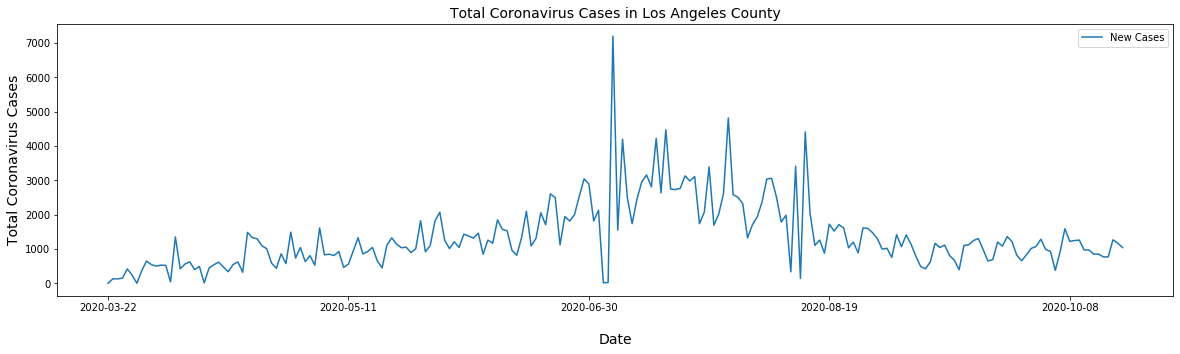

In [23]:
# Plot the number of cases for LA County
la_county_df = covid_county_df.loc['California'][['County','New Cases','Date']]
mask1 = la_county_df['County']=='Los Angeles'
la_county_df=la_county_df[mask1]
la_county_df.sort_values(by='Date', inplace=True)

la_county_df.plot(kind='line', x='Date', y='New Cases', figsize=(20,5))
plt.title("Total Coronavirus Cases in Los Angeles County", fontsize=14)
plt.xlabel("\nDate", fontsize=14)
plt.ylabel("Total Coronavirus Cases", fontsize=14)

In [24]:
new_cases_df = la_county_df.sort_values(by='Date', ascending=False).head(1)
new_cases = new_cases_df.loc['California']['New Cases']
date = new_cases_df.loc['California']['Date']
tot_cases = california_cases_by_county_df.loc['Los Angeles']['Total Cases']
print(f'There were {new_cases:,} new cases reported for a total of {tot_cases:,} cases on {date} in LA County, CA.')

There were 1,039 new cases reported for a total of 287,222 cases on 2020-10-16 in LA County, CA.


### Plot Total Coronavirus Cases in Fulton County, IN

Text(0, 0.5, 'Total Coronavirus Cases')

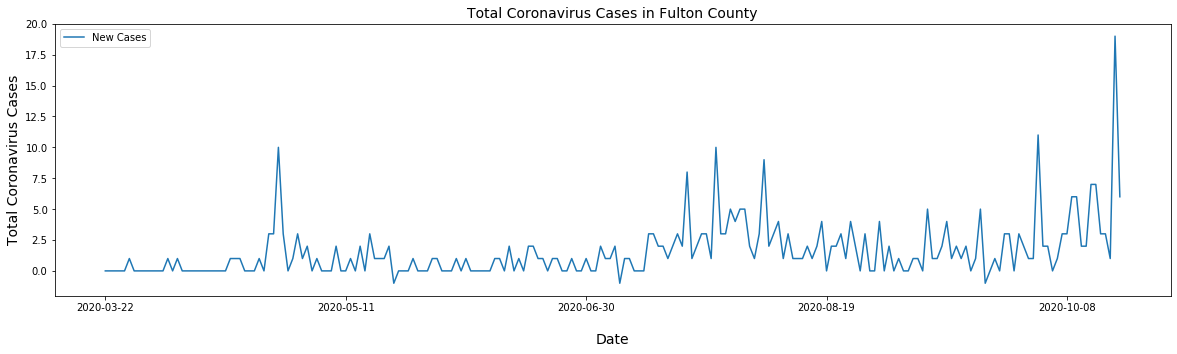

In [25]:
# Plot the number of cases for Fulton County
fulton_county_df = covid_county_df.loc['Indiana'][['County','New Cases','Date']]
mask1 = fulton_county_df['County']=='Fulton'
fulton_county_df=fulton_county_df[mask1]
fulton_county_df.sort_values(by='Date', inplace=True)

fulton_county_df.plot(kind='line', x='Date', y='New Cases', figsize=(20,5))
plt.title("Total Coronavirus Cases in Fulton County", fontsize=14)
plt.xlabel("\nDate", fontsize=14)
plt.ylabel("Total Coronavirus Cases", fontsize=14)

In [26]:
new_cases_df = fulton_county_df.sort_values(by='Date', ascending=False).head(1)
new_cases = new_cases_df.loc['Indiana']['New Cases']
date = new_cases_df.loc['Indiana']['Date']
tot_cases = indiana_cases_by_county_df.loc['Fulton']['Total Cases']
print(f'There were {new_cases:,} new cases reported for a total of {tot_cases} cases on {date} in Fulton County, CA.')

There were 6 new cases reported for a total of 320 cases on 2020-10-16 in Fulton County, CA.


### Plot Total Coronavirus cases in California

In [27]:
cal_plots_df=state_plots_df[['State', 'Total Cases']]
mask1 = cal_plots_df['State']=='California'
mask2 = cal_plots_df['State'] == 'Indiana'

cal_plots_df = cal_plots_df[mask1]

Text(0, 0.5, 'Total Covid Cases')

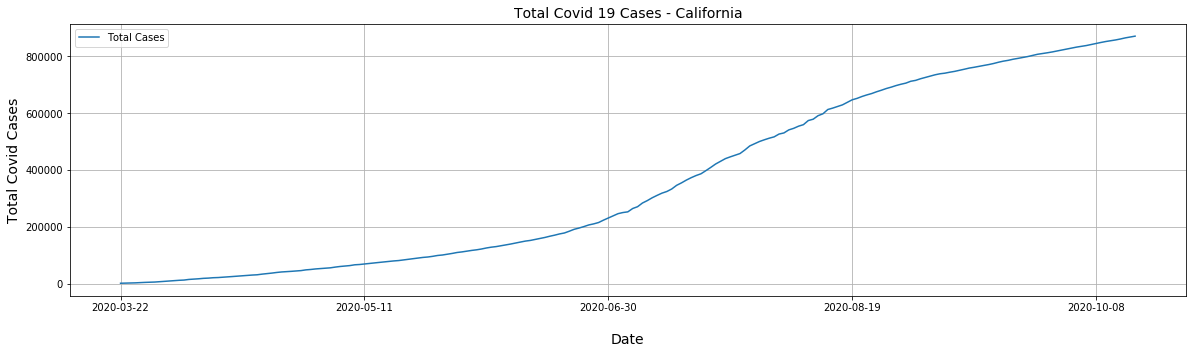

In [28]:
cal_plots_df.plot.line( y='Total Cases', figsize=(20,5), grid=True)

# Label plot
plt.title("Total Covid 19 Cases - California", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('Total Covid Cases', fontsize=14)

In [29]:
tot_cases_today = last_state_date_df.loc['California']['Total Cases']
date = last_state_date_df.loc['California']['Date']
print(f'Total number of coronavirus cases reported on {date}: {tot_cases_today:,}')

Total number of coronavirus cases reported on 2020-10-16: 871,253


### Plot New Coronavirus cases in California

In [30]:
cal_plots_df=state_plots_df[['State', 'New Cases']]
mask1 = cal_plots_df['State']=='California'

cal_plots_df = cal_plots_df[mask1]

Text(0, 0.5, 'New Covid Cases')

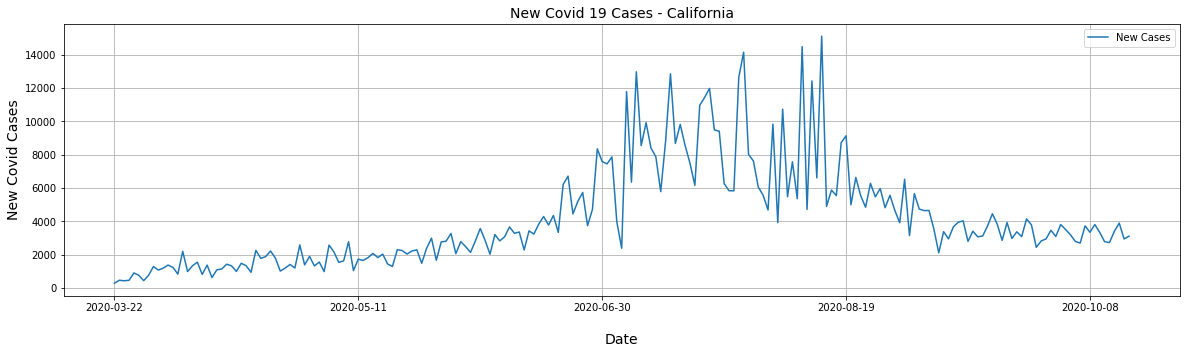

In [31]:
cal_plots_df.plot.line( y='New Cases', figsize=(20,5), grid=True)

# Label plot
plt.title("New Covid 19 Cases - California", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('New Covid Cases', fontsize=14)

In [32]:
new_cases_today = last_state_date_df.loc['California']['New Cases']
date = last_state_date_df.loc['California']['Date']
print(f'Total number of new coronavirus cases reported on {date}: {new_cases_today:,}')

Total number of new coronavirus cases reported on 2020-10-16: 3,105


### Plot Total Coronavirus Deaths in California

In [33]:
cal_plots_df=state_plots_df[['State', 'Total Deaths']]
mask1 = cal_plots_df['State']=='California'

cal_plots_df = cal_plots_df[mask1]

Text(0, 0.5, 'Total Covid Deaths')

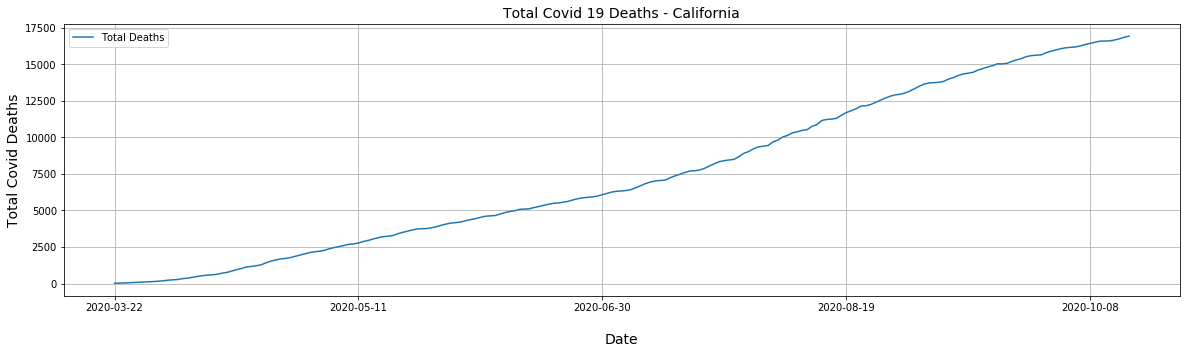

In [34]:
cal_plots_df.plot.line( y='Total Deaths', figsize=(20,5), grid=True)

# Label plot
plt.title("Total Covid 19 Deaths - California", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('Total Covid Deaths', fontsize=14)

In [35]:
tot_deaths = last_state_date_df.loc['California']['Total Deaths']
date = last_state_date_df.loc['California']['Date']
print(f'Total number of coronavirus deaths as of {date}: {tot_deaths:,}')

Total number of coronavirus deaths as of 2020-10-16: 16,910


### Plot New Coronavirus Deaths in California

In [36]:
cal_plots_df=state_plots_df[['State', 'New Deaths']]
mask1 = cal_plots_df['State']=='California'

cal_plots_df = cal_plots_df[mask1]

Text(0, 0.5, 'New Covid Deaths')

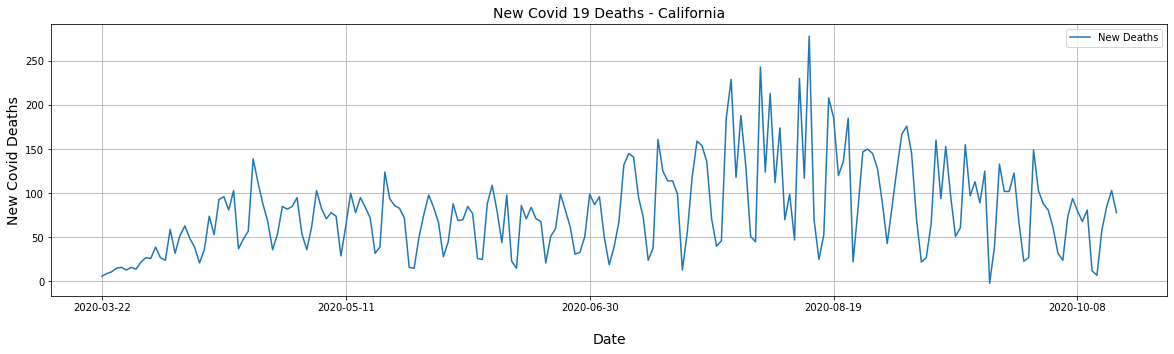

In [37]:
cal_plots_df.plot.line( y='New Deaths', figsize=(20,5), grid=True)

# Label plot
plt.title("New Covid 19 Deaths - California", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('New Covid Deaths', fontsize=14)

In [38]:
new_deaths = last_state_date_df.loc['California']['New Deaths']
date = last_state_date_df.loc['California']['Date']
print(f'Total number of new coronavirus deaths reported on {date}: {new_deaths:,}')

Total number of new coronavirus deaths reported on 2020-10-16: 78


### Plot Total Coronavirus cases in Indiana

In [39]:
ind_plots_df=state_plots_df[['State', 'Total Cases']]
mask1 = ind_plots_df['State'] == 'Indiana'

ind_plots_df = ind_plots_df[mask1]

Text(0, 0.5, 'Total Covid Cases')

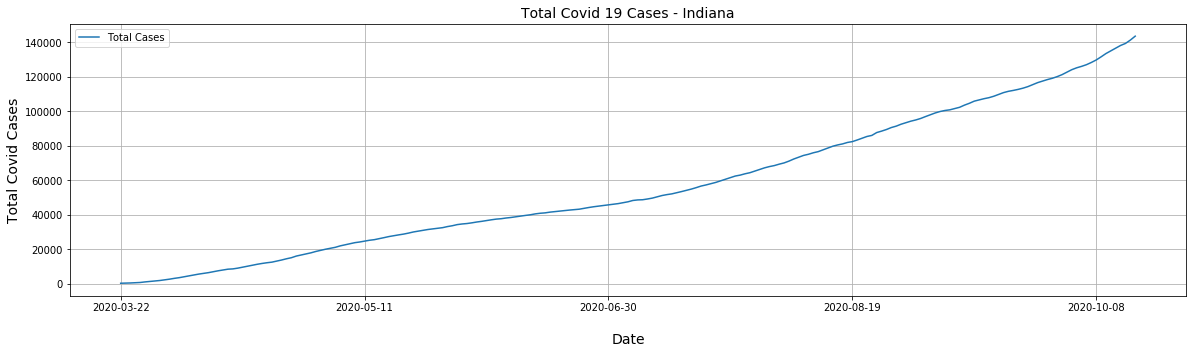

In [40]:
ind_plots_df.plot.line( y='Total Cases', figsize=(20,5), grid=True)

# Label plot
plt.title("Total Covid 19 Cases - Indiana", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('Total Covid Cases', fontsize=14)

In [41]:
tot_cases_today = last_state_date_df.loc['Indiana']['Total Cases']
date = last_state_date_df.loc['Indiana']['Date']
print(f'Total number of coronavirus cases reported on {date}: {tot_cases_today:,}')

Total number of coronavirus cases reported on 2020-10-16: 143,495


### Plot New Coronavirus cases in Indiana

In [42]:
ind_plots_df=state_plots_df[['State', 'New Cases']]
mask1 = ind_plots_df['State'] == 'Indiana'

ind_plots_df = ind_plots_df[mask1]

Text(0, 0.5, 'New Covid Cases')

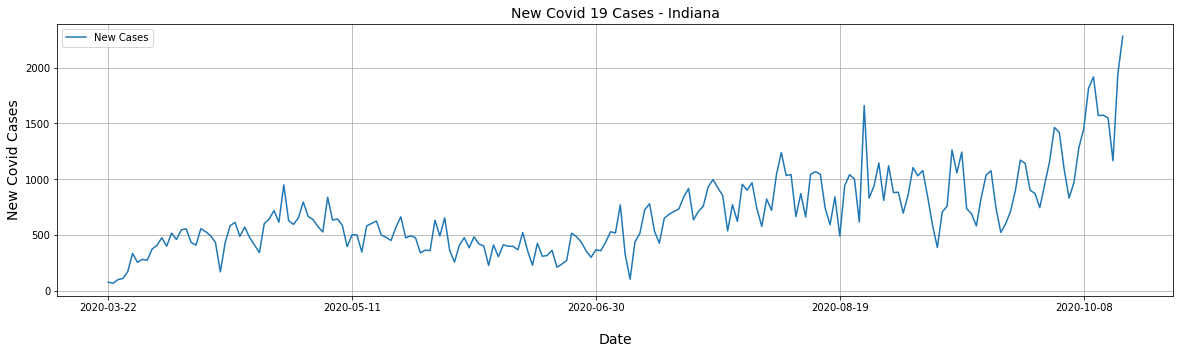

In [43]:
ind_plots_df.plot.line( y='New Cases', figsize=(20,5), grid=True)

# Label plot
plt.title("New Covid 19 Cases - Indiana", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('New Covid Cases', fontsize=14)

In [44]:
new_cases_today = last_state_date_df.loc['Indiana']['New Cases']
date = last_state_date_df.loc['Indiana']['Date']
print(f'Total number of new coronavirus cases reported on {date}: {new_cases_today:,}')

Total number of new coronavirus cases reported on 2020-10-16: 2,283


### Plot Total Coronavirus Deaths in Indiana

In [45]:
ind_plots_df=state_plots_df[['State', 'Total Deaths']]
mask1 = ind_plots_df['State'] == 'Indiana'

ind_plots_df = ind_plots_df[mask1]

Text(0, 0.5, 'Total Covid Deaths')

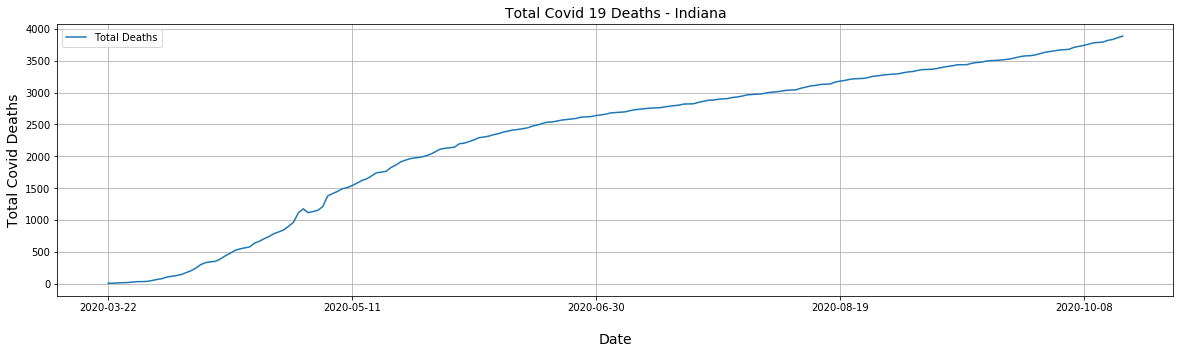

In [46]:
ind_plots_df.plot.line( y='Total Deaths', figsize=(20,5), grid=True)

# Label plot
plt.title("Total Covid 19 Deaths - Indiana", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('Total Covid Deaths', fontsize=14)

In [47]:
tot_deaths = last_state_date_df.loc['Indiana']['Total Deaths']
date = last_state_date_df.loc['Indiana']['Date']
print(f'Total number of coronavirus deaths as of {date}: {tot_deaths:,}')

Total number of coronavirus deaths as of 2020-10-16: 3,887


### Plot New Coronavirus Deaths in Indiana

In [48]:
ind_plots_df=state_plots_df[['State', 'New Deaths']]
mask1 = ind_plots_df['State'] == 'Indiana'

ind_plots_df = ind_plots_df[mask1]

Text(0, 0.5, 'New Covid Deaths')

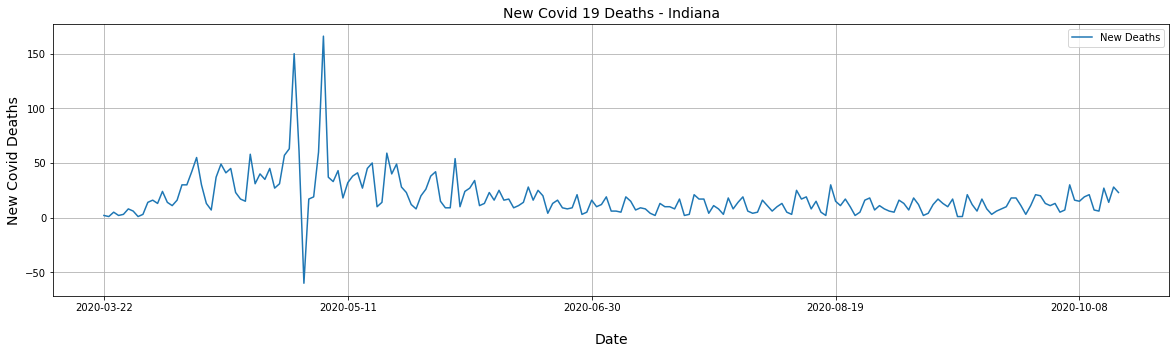

In [49]:
ind_plots_df.plot.line( y='New Deaths', figsize=(20,5), grid=True)

# Label plot
plt.title("New Covid 19 Deaths - Indiana", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('New Covid Deaths', fontsize=14)

In [50]:
new_deaths = last_state_date_df.loc['Indiana']['New Deaths']
date = last_state_date_df.loc['Indiana']['Date']
print(f'Total number of new coronavirus deaths reported on {date}: {new_deaths:,}')

Total number of new coronavirus deaths reported on 2020-10-16: 23
